# Week 4, Individual Coding Assignment
## Maya Deshpande
## UP 221: GIS & Spatial Data Science

### The following analysis is on race population data per census tract in LA County. Our group will use this data to build social context around mobility for care workers at a specific care destination in LA.

##### Read in census population data, show shape and first five rows.

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
race_data = pd.read_csv('census-tracts-2010-population-data.csv')
print(race_data.shape)
race_data.head()

(1012, 25)


,OBJECTID,TRACTCE10,POP,LATPOP_D,WHIPOP_D,BLAPOP_D,AMIPOP_D,ASIPOP_D,HPIPOP_D,OTHPOP_D,MMRPOP_D,VAP,LATVAP_D,WHIVAP_D,BLAVAP_D,AMIVAP_D,ASIVAP_D,HPIVAP_D,OTHVAP_D,MMRVAP_D,H0010001,H0010002,H0010003,TOOLTIP,NLA_URL
0,1,101110,4731,1324,2656,74,14,486,4,30,143,3800,930,2268,59,13,396,4,22,108,1734,1641,93,Tract: 1011.10\nTotal Population: 4731,navigatela/reports/census_tracts_2010.cfm?PK=1...
1,2,101122,3664,575,2437,26,4,495,1,10,116,3018,413,2066,19,4,426,1,8,81,1369,1325,44,Tract: 1011.22\nTotal Population: 3664,navigatela/reports/census_tracts_2010.cfm?PK=1...
2,3,101210,5990,2219,2890,183,6,448,3,5,236,4614,1479,2404,137,5,390,2,3,194,2317,2150,167,Tract: 1012.10\nTotal Population: 5990,navigatela/reports/census_tracts_2010.cfm?PK=1...
3,4,101220,3363,1272,1662,36,11,272,2,3,105,2607,861,1414,22,11,219,2,2,76,1317,1246,71,Tract: 1012.20\nTotal Population: 3363,navigatela/reports/census_tracts_2010.cfm?PK=1...
4,5,101300,4199,503,3190,41,5,317,3,7,133,3495,371,2714,31,5,272,2,6,94,1582,1542,40,Tract: 1013.00\nTotal Population: 4199,navigatela/reports/census_tracts_2010.cfm?PK=1...


##### Let's look at all columns in the data.

In [121]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Display a random row in the dataset.
race_data.sample()

,OBJECTID,TRACTCE10,POP,LATPOP_D,WHIPOP_D,BLAPOP_D,AMIPOP_D,ASIPOP_D,HPIPOP_D,OTHPOP_D,MMRPOP_D,VAP,LATVAP_D,WHIVAP_D,BLAVAP_D,AMIVAP_D,ASIVAP_D,HPIVAP_D,OTHVAP_D,MMRVAP_D,H0010001,H0010002,H0010003,TOOLTIP,NLA_URL
543,544,207502,2589,321,514,128,2,1552,5,4,63,2514,296,509,126,2,1519,4,4,54,2043,1872,171,Tract: 2075.02\nTotal Population: 2589,navigatela/reports/census_tracts_2010.cfm?PK=2...


##### Now examine the data types.

In [122]:
race_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OBJECTID   1012 non-null   int64 
 1   TRACTCE10  1012 non-null   int64 
 2   POP        1012 non-null   int64 
 3   LATPOP_D   1012 non-null   int64 
 4   WHIPOP_D   1012 non-null   int64 
 5   BLAPOP_D   1012 non-null   int64 
 6   AMIPOP_D   1012 non-null   int64 
 7   ASIPOP_D   1012 non-null   int64 
 8   HPIPOP_D   1012 non-null   int64 
 9   OTHPOP_D   1012 non-null   int64 
 10  MMRPOP_D   1012 non-null   int64 
 11  VAP        1012 non-null   int64 
 12  LATVAP_D   1012 non-null   int64 
 13  WHIVAP_D   1012 non-null   int64 
 14  BLAVAP_D   1012 non-null   int64 
 15  AMIVAP_D   1012 non-null   int64 
 16  ASIVAP_D   1012 non-null   int64 
 17  HPIVAP_D   1012 non-null   int64 
 18  OTHVAP_D   1012 non-null   int64 
 19  MMRVAP_D   1012 non-null   int64 
 20  H0010001   1012 non-null   int

##### Get rid of null columns.

In [123]:
race_data.columns[race_data.isna().all()].tolist()
race_data = race_data.dropna(axis=1,how="all")

##### Reinspect a sample of the data. No columns were null, therefore none were dropped.

In [124]:
race_data.info()
race_data.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OBJECTID   1012 non-null   int64 
 1   TRACTCE10  1012 non-null   int64 
 2   POP        1012 non-null   int64 
 3   LATPOP_D   1012 non-null   int64 
 4   WHIPOP_D   1012 non-null   int64 
 5   BLAPOP_D   1012 non-null   int64 
 6   AMIPOP_D   1012 non-null   int64 
 7   ASIPOP_D   1012 non-null   int64 
 8   HPIPOP_D   1012 non-null   int64 
 9   OTHPOP_D   1012 non-null   int64 
 10  MMRPOP_D   1012 non-null   int64 
 11  VAP        1012 non-null   int64 
 12  LATVAP_D   1012 non-null   int64 
 13  WHIVAP_D   1012 non-null   int64 
 14  BLAVAP_D   1012 non-null   int64 
 15  AMIVAP_D   1012 non-null   int64 
 16  ASIVAP_D   1012 non-null   int64 
 17  HPIVAP_D   1012 non-null   int64 
 18  OTHVAP_D   1012 non-null   int64 
 19  MMRVAP_D   1012 non-null   int64 
 20  H0010001   1012 non-null   int

,OBJECTID,TRACTCE10,POP,LATPOP_D,WHIPOP_D,BLAPOP_D,AMIPOP_D,ASIPOP_D,HPIPOP_D,OTHPOP_D,MMRPOP_D,VAP,LATVAP_D,WHIVAP_D,BLAVAP_D,AMIVAP_D,ASIVAP_D,HPIVAP_D,OTHVAP_D,MMRVAP_D,H0010001,H0010002,H0010003,TOOLTIP,NLA_URL
252,253,131300,4902,3059,1023,100,11,609,7,12,81,3708,2151,893,79,7,502,7,8,61,1220,1177,43,Tract: 1313.00\nTotal Population: 4902,navigatela/reports/census_tracts_2010.cfm?PK=1...


##### Identify columns to keep: race population columns.

##### Note to self: After lots of research, I still can't figure out what MMR Population represents. The most highly MMR-populated areas are UCLA campus and Playa Vista near Loyola Marymount University. I'm leaving MMRPOP_D out of my map for now, but may need to add it in later.

In [125]:
columns_to_keep = ['OBJECTID',
                   'TRACTCE10',
                   'POP',
                   'LATPOP_D',
                   'WHIPOP_D',
                   'BLAPOP_D',
                   'AMIPOP_D',
                   'ASIPOP_D',
                   'HPIPOP_D',
                   'OTHPOP_D'
                  ]

##### Create new dataset with all necessary columns.

In [126]:
race_data_final = race_data[columns_to_keep]
race_data_final.head()

,OBJECTID,TRACTCE10,POP,LATPOP_D,WHIPOP_D,BLAPOP_D,AMIPOP_D,ASIPOP_D,HPIPOP_D,OTHPOP_D
0,1,101110,4731,1324,2656,74,14,486,4,30
1,2,101122,3664,575,2437,26,4,495,1,10
2,3,101210,5990,2219,2890,183,6,448,3,5
3,4,101220,3363,1272,1662,36,11,272,2,3
4,5,101300,4199,503,3190,41,5,317,3,7


##### Rename columns.

In [127]:
columns = list(race_data_final) # this is the same as df.columns.to_list()
race_data_final.columns = ['id',
'tract_id',
'total_pop',
'latinx_pop',
'white_pop',
'black_pop',
'american_indian_pop',
'asian_pop',
'hawaiian_pac_islander_pop',
'other_pop']
# See new columns applide to dataset.
race_data_final.sample(5)

,id,tract_id,total_pop,latinx_pop,white_pop,black_pop,american_indian_pop,asian_pop,hawaiian_pac_islander_pop,other_pop
594,595,211922,3389,1803,181,191,7,1159,1,9
455,456,194102,3458,177,2838,109,4,225,2,11
205,206,125100,5431,1056,3496,367,10,306,5,23
375,376,185202,3712,2377,889,113,9,250,1,13
502,503,201504,2428,2136,80,20,12,172,0,1


##### Need to create a Non-white population column, which sums all population column values except for white_pop.

In [128]:
race_data_final['non_white_pop'] = race_data_final['black_pop'] + race_data_final['american_indian_pop'] + race_data_final['asian_pop'] + race_data_final['hawaiian_pac_islander_pop'] + race_data_final['other_pop']

/tmp/ipykernel_119/3314255331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data_final['non_white_pop'] = race_data_final['black_pop'] + race_data_final['american_indian_pop'] + race_data_final['asian_pop'] + race_data_final['hawaiian_pac_islander_pop'] + race_data_final['other_pop']


##### Latinx population can be any race, so we don't include that population category in our count. Because we aren't including latinx_pop or MMRPOP_D, we cannot simply subtract white_pop from total_pop for our new column.

##### Also need to add a FIPS columns with LA-Specific Census Tract numbers.

In [129]:
race_data_final['FIPS'] ='06' + '037' + race_data_final['tract_id'].astype(str)
race_data_final.sample(5)

/tmp/ipykernel_119/3082183527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data_final['FIPS'] ='06' + '037' + race_data_final['tract_id'].astype(str)


,id,tract_id,total_pop,latinx_pop,white_pop,black_pop,american_indian_pop,asian_pop,hawaiian_pac_islander_pop,other_pop,non_white_pop,FIPS
433,434,191410,5092,3723,304,185,6,794,10,18,1013,06037191410
562,563,209102,5267,4026,162,308,10,708,6,16,1048,06037209102
100,101,113401,5543,2232,2002,200,7,949,4,9,1169,06037113401
740,741,232400,6957,3926,89,2753,10,52,2,45,2862,06037232400
732,733,231710,4358,3449,20,820,12,12,3,25,872,06037231710


##### Import geopandas library for mapping

In [131]:
import geopandas as gpd
# read in a geojson file downloaded from the LA Times
tracts = gpd.read_file('census_tracts_2010.geojson')
tracts.head()

,OBJECTID,GEOID10,CT10,LABEL,Shape__Area,Shape__Length,geometry
0,1,06037911001,911001,9110.01,5.518756e+08,130967.821357,"POLYGON ((-117.66713 34.55801, -117.66713 34.5..."
1,2,06037980003,980003,9800.03,2.870875e+08,101384.949924,"POLYGON ((-117.88062 34.76362, -117.88252 34.7..."
2,3,06037930301,930301,9303.01,1.517472e+09,232176.490067,"POLYGON ((-117.65525 34.39723, -117.65519 34.3..."
3,4,06037573003,573003,5730.03,6.505064e+05,3324.521203,"POLYGON ((-118.19925 33.79713, -118.19925 33.7..."
4,5,06037297602,297602,2976.02,9.014198e+05,4520.897188,"POLYGON ((-118.28799 33.72259, -118.28799 33.7..."


##### Exclude all columns from dataset except FIPS and geometry from census tract geography data.

In [132]:
tracts = tracts[['GEOID10','geometry']]
tracts.rename(columns = {'GEOID10':'FIPS'}, inplace = True)
tracts.head()

,FIPS,geometry
0,06037911001,"POLYGON ((-117.66713 34.55801, -117.66713 34.5..."
1,06037980003,"POLYGON ((-117.88062 34.76362, -117.88252 34.7..."
2,06037930301,"POLYGON ((-117.65525 34.39723, -117.65519 34.3..."
3,06037573003,"POLYGON ((-118.19925 33.79713, -118.19925 33.7..."
4,06037297602,"POLYGON ((-118.28799 33.72259, -118.28799 33.7..."


##### Join the census tract data and income data based on FIPS.

In [133]:
tracts_race = tracts.merge(race_data_final,on="FIPS")
tracts_race.head()

,FIPS,geometry,id,tract_id,total_pop,latinx_pop,white_pop,black_pop,american_indian_pop,asian_pop,hawaiian_pac_islander_pop,other_pop,non_white_pop
0,06037297602,"POLYGON ((-118.28799 33.72259, -118.28799 33.7...",986,297602,3503,1130,1871,205,23,152,7,4,391
1,06037297601,"MULTIPOLYGON (((-118.28449 33.70997, -118.2842...",985,297601,2594,699,1300,289,14,133,18,11,465
2,06037293306,"POLYGON ((-118.29996 33.78349, -118.29750 33.7...",949,293306,2189,825,986,110,10,186,13,1,320
3,06037295103,"POLYGON ((-118.28209 33.76675, -118.28304 33.7...",967,295103,4875,1058,2988,148,11,501,4,7,671
4,06037980015,"POLYGON ((-118.28449 33.79085, -118.28439 33.7...",1002,980015,554,271,109,96,3,45,13,0,157


Density of Non-White Population in LA County Census Tracts


<AxesSubplot: >

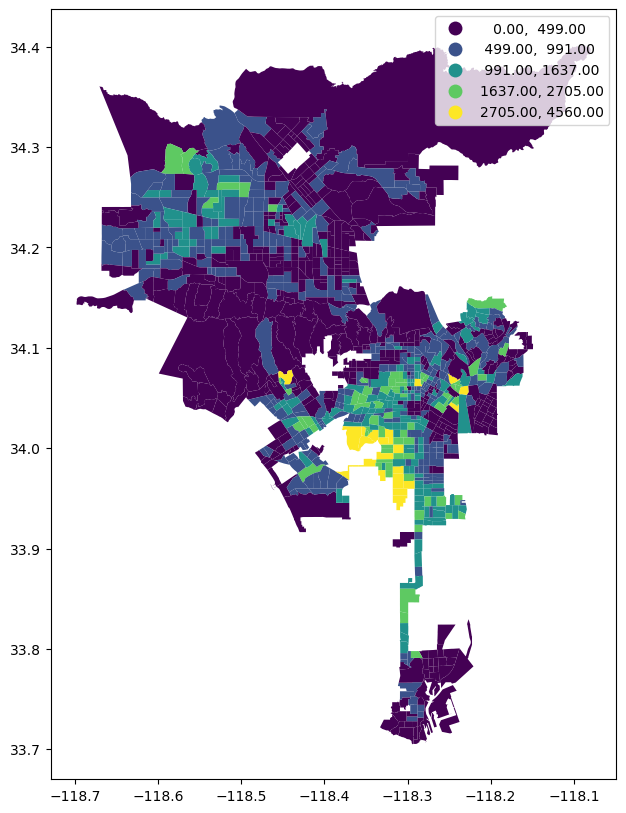

In [134]:
print("Density of Non-White Population in LA County Census Tracts")
tracts_race.plot(figsize=(12,10),
                 column='non_white_pop',
                 legend=True, 
                 scheme='NaturalBreaks')